In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
import pickle 
import numpy as np
import torch
import os

In [4]:
from core.EmbeddingDataSet import EmbeddingDataSet

In [6]:
dataset_name = 'pubmed'
parent_dir = os.path.abspath('..')
input_dir = os.path.join(parent_dir, 'data')
dataset = EmbeddingDataSet(dataset_name, input_dir)
dataset.create_all_data(n_batches=1, shuffle=False)
dataset.summarise()

Name of dataset = pubmed
Input dimension = 500
Number of training samples = 19717
Training labels = True
Graph information = True


In [7]:
G = dataset.all_data[0]

In [8]:
len(G.labels)

19717

In [9]:
G.adj_matrix

<19717x19717 sparse matrix of type '<class 'numpy.int64'>'
	with 88651 stored elements in COOrdinate format>

In [10]:
D = np.sum(G.adj_matrix.toarray(), axis=1)

In [11]:
# Average degree
np.average(D)

4.496170817061419

In [12]:
import matplotlib.pyplot as plt

(array([1.7124e+04, 1.5410e+03, 6.3400e+02, 2.0400e+02, 1.1000e+02,
        4.3000e+01, 2.8000e+01, 1.2000e+01, 1.2000e+01, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,   9.5,  18. ,  26.5,  35. ,  43.5,  52. ,  60.5,  69. ,
         77.5,  86. ,  94.5, 103. , 111.5, 120. , 128.5, 137. , 145.5,
        154. , 162.5, 171. ]),
 <a list of 20 Patch objects>)

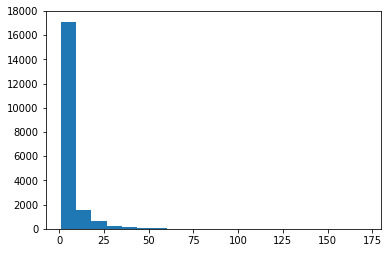

In [13]:
plt.hist(D, bins=20)

In [15]:
from scipy.sparse.csgraph import connected_components
from sklearn.manifold.spectral_embedding_ import _graph_connected_component

In [16]:
foo = _graph_connected_component(G.adj_matrix, 0)
foo.sum()

19717

In [17]:
n = len(G.labels)
visited = np.zeros((n,), dtype=bool)
component_sizes = []
for i in range(n):
    if not visited[i]:
        visited[i] = True
        mask = _graph_connected_component(G.adj_matrix, i)
        component_sizes.append(mask.sum())
        visited = np.logical_or(visited, mask)

In [18]:
# The largest connected component has size 2,485 and is reachable from node 0
print("Number of connected components: ", len(component_sizes))
print("Size of largest connected component: ", max(component_sizes))

Number of connected components:  1
Size of largest connected component:  19717


In [19]:
G.data.shape

torch.Size([19717, 500])

In [20]:
from sklearn.manifold import TSNE
embedder = TSNE(n_components=2, metric='cosine', perplexity=30, verbose=1)
X_emb = embedder.fit_transform(G.data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19717 samples in 0.004s...
[t-SNE] Computed neighbors for 19717 samples in 7.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19717
[t-SNE] Computed conditional probabilities for sample 2000 / 19717
[t-SNE] Computed conditional probabilities for sample 3000 / 19717
[t-SNE] Computed conditional probabilities for sample 4000 / 19717
[t-SNE] Computed conditional probabilities for sample 5000 / 19717
[t-SNE] Computed conditional probabilities for sample 6000 / 19717
[t-SNE] Computed conditional probabilities for sample 7000 / 19717
[t-SNE] Computed conditional probabilities for sample 8000 / 19717
[t-SNE] Computed conditional probabilities for sample 9000 / 19717
[t-SNE] Computed conditional probabilities for sample 10000 / 19717
[t-SNE] Computed conditional probabilities for sample 11000 / 19717
[t-SNE] Computed conditional probabilities for sample 12000 / 19717
[t-SNE] Computed conditional probabilities for sam

In [30]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [32]:
from util.plot_graph_embedding import plot_graph_embedding
plot_graph_embedding(X_emb, dataset.labels, dataset.adj_matrix, line_alpha=0.0)

In [33]:
n_plot = 3000
mask = np.random.choice(dataset.all_indices, size=n_plot, replace=False)
y_emb = X_emb[mask]
labels = dataset.labels[mask]
W = dataset.adj_matrix[mask, :][:, mask]
plot_graph_embedding(y_emb, labels, W, line_alpha=0.1)